In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [3]:
pokemon = pd.read_csv("E:\Data\Projets\Pokemon_2\datas\pokedex.csv", sep=",", header=0, encoding="cp1252")
pokemon.head()

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,FAUX


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      799 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   POINTS_ATTAQUE           800 non-null    int64 
 6   POINTS_DEFFENCE          800 non-null    int64 
 7   POINTS_ATTAQUE_SPECIALE  800 non-null    int64 
 8   POINT_DEFENSE_SPECIALE   800 non-null    int64 
 9   POINTS_VITESSE           800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    object
dtypes: int64(8), object(4)
memory usage: 75.1+ KB


In [5]:
pokemon[pokemon["NOM"].isnull()]

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
62,63,NaN,Combat,NaN,65,105,60,60,70,95,1,FAUX


In [6]:
pokemon["NOM"][62] = "Colossinge"

In [7]:
combats = pd.read_csv("E:\Data\Projets\Pokemon_2\Datas\combats.csv", sep=",",header=0)
combats.head()

,Premier_Pokemon,Second_Pokemon,Pokemon_Gagnant
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [8]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [9]:
nb_combats = combats.copy()

pos_1 = nb_combats.groupby('Premier_Pokemon').count()
pos_2 = nb_combats.groupby('Second_Pokemon').count()
nb_victoires = nb_combats.groupby("Pokemon_Gagnant").count()

combats_score = nb_combats.groupby("Pokemon_Gagnant").count()
combats_score.sort_index()

combats_score["NBRE_COMBATS"] = pos_1.Pokemon_Gagnant + pos_2.Pokemon_Gagnant
combats_score["NBRE_VICTOIRES"] = nb_victoires.Premier_Pokemon
combats_score["RATIO_VICTOIRES"] = combats_score["NBRE_VICTOIRES"]/combats_score["NBRE_COMBATS"]

del(combats_score["Premier_Pokemon"])
del(combats_score["Second_Pokemon"])

combats_score

,NBRE_COMBATS,NBRE_VICTOIRES,RATIO_VICTOIRES
Pokemon_Gagnant,,,
1,133,37,0.278195
2,121,46,0.380165
3,132,89,0.674242
4,125,70,0.560000
5,112,55,0.491071
...,...,...,...
796,105,39,0.371429
797,131,116,0.885496
798,119,60,0.504202


In [10]:
combats_score.describe()

,NBRE_COMBATS,NBRE_VICTOIRES,RATIO_VICTOIRES
count,783.000000,783.000000,783.000000
mean,127.541507,63.856960,0.501538
std,11.397402,32.925941,0.254993
min,92.000000,3.000000,0.021739
25%,120.000000,36.000000,0.284228
50%,128.000000,62.000000,0.491071
75%,135.000000,91.000000,0.717644
max,164.000000,152.000000,0.984496


In [11]:
pokedex = pokemon.merge(combats_score, left_on="NUMERO", right_index=True, how="left")
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,NBRE_COMBATS,NBRE_VICTOIRES,RATIO_VICTOIRES
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX,125.0,70.0,0.560000
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,FAUX,112.0,55.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fee,50,100,150,100,150,50,6,VRAI,105.0,39.0,0.371429
796,797,Mega Diancie,Roche,Fee,50,160,110,160,110,110,6,VRAI,131.0,116.0,0.885496
797,798,Hoopa confine,Psy,Spectre,80,110,60,150,130,70,6,VRAI,119.0,60.0,0.504202
798,799,Hoopa non lie,Psy,Obscur,80,160,60,170,130,80,6,VRAI,144.0,89.0,0.618056


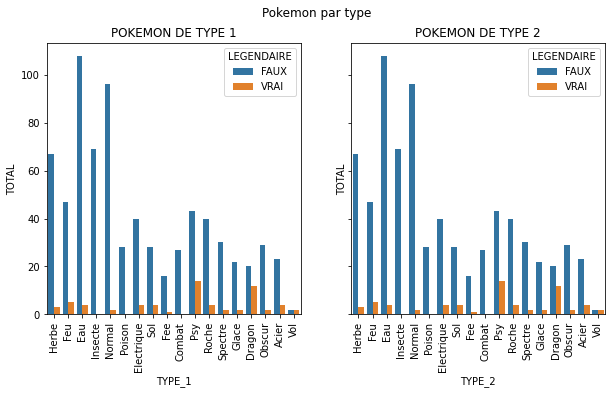

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('Pokemon par type')

sns.countplot(data=pokedex, x="TYPE_1",hue="LEGENDAIRE", ax=axes[0])
axes[0].set_title("POKEMON DE TYPE 1")
axes[0].set_xlabel("TYPE_1")
axes[0].set_ylabel("TOTAL")
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

sns.countplot(data=pokedex, x="TYPE_1",hue="LEGENDAIRE", ax=axes[1])
axes[1].set_title("POKEMON DE TYPE 2")
axes[1].set_xlabel("TYPE_2")
axes[1].set_ylabel("TOTAL")
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)

plt.show()

In [13]:
features = ["TYPE_1","TYPE_2","RATIO_VICTOIRES"]
pokedex[features].groupby(["TYPE_1", "TYPE_2"]).mean().sort_values(by="RATIO_VICTOIRES",ascending=False)

RATIO_VICTOIRES
TYPE_1 TYPE_2                 
Normal Combat         0.960295
Obscur Glace          0.956422
Herbe  Dragon         0.944444
Acier  Combat         0.914062
Combat Vol            0.884298
...                        ...
Roche  Acier          0.170116
       Herbe          0.162046
Normal Fee            0.154699
Poison Eau            0.112903
Feu    Roche          0.072581

[136 rows x 1 columns]

In [14]:
features = ["TYPE_1","RATIO_VICTOIRES"]
type_ratio_victoires = pokedex[features].groupby(["TYPE_1"]).mean().sort_values(by="RATIO_VICTOIRES",ascending=False)
type_ratio_victoires

,RATIO_VICTOIRES
TYPE_1,
Vol,0.765061
Dragon,0.633587
Electrique,0.632861
Obscur,0.629726
Feu,0.579215
Psy,0.545747
Sol,0.541526
Normal,0.535578
Spectre,0.484027


In [15]:
pokedex["LEGENDAIRE"] = pokedex["LEGENDAIRE"].replace(to_replace="FAUX", value=0, regex=False)
pokedex["LEGENDAIRE"] = pokedex["LEGENDAIRE"].replace(to_replace="VRAI", value=1, regex=False)

pokedex.to_csv("../datas/dataset.csv", sep=",", index=False)

In [17]:
pokemon.values

array([[1, 'Bulbizarre', 'Herbe', ..., 45, 1, 'FAUX'],
       [2, 'Herbizarre', 'Herbe', ..., 60, 1, 'FAUX'],
       [3, 'Florizarre', 'Herbe', ..., 80, 1, 'FAUX'],
       ...,
       [798, 'Hoopa confine', 'Psy', ..., 70, 6, 'VRAI'],
       [799, 'Hoopa non lie', 'Psy', ..., 80, 6, 'VRAI'],
       [800, 'Volcanion', 'Feu', ..., 70, 6, 'VRAI']], dtype=object)